<a href="https://colab.research.google.com/github/JuanOpizzi/Datos-2020-2c/blob/master/tp_inicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 arranque


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

df_data = pd.read_csv("tp-2020-2c-train-cols2.csv")
df_decision = pd.read_csv("tp-2020-2c-train-cols1.csv")

In [ ]:
df_data.head()

tipo_de_sala                   nombre  id_usuario  genero  edad  amigos  \
0           4d       Señor Camilo Pedro         117  hombre  73.5       0   
1           4d   Señora Raquel Angelica         658   mujer  35.0       1   
2       normal   Señor Antonio Federico         794  hombre   NaN       0   
3           4d  Señor Osvaldo Aureliano         455  hombre   NaN       0   
4           4d    Señorita Rita Eudosia         173   mujer   4.0       1   

   parientes id_ticket  precio_ticket fila        nombre_sede  
0          0    59258;              1  NaN    fiumark_quilmes  
1          1    586:6;              2  NaN    fiumark_quilmes  
2          0  RE"39822              3  NaN  fiumark_chacarita  
3          0  C17"4:39              1  NaN    fiumark_palermo  
4          1    569964              2  NaN    fiumark_palermo

In [ ]:
df_decision.head()

id_usuario  volveria
0         117         0
1         658         0
2         794         0
3         455         0
4         173         1

In [ ]:
df = pd.merge(df_data, df_decision, how='inner', left_on='id_usuario', right_on='id_usuario')
df.head()

tipo_de_sala                   nombre  id_usuario  genero  edad  amigos  \
0           4d       Señor Camilo Pedro         117  hombre  73.5       0   
1           4d   Señora Raquel Angelica         658   mujer  35.0       1   
2       normal   Señor Antonio Federico         794  hombre   NaN       0   
3           4d  Señor Osvaldo Aureliano         455  hombre   NaN       0   
4           4d    Señorita Rita Eudosia         173   mujer   4.0       1   

   parientes id_ticket  precio_ticket fila        nombre_sede  volveria  
0          0    59258;              1  NaN    fiumark_quilmes         0  
1          1    586:6;              2  NaN    fiumark_quilmes         0  
2          0  RE"39822              3  NaN  fiumark_chacarita         0  
3          0  C17"4:39              1  NaN    fiumark_palermo         0  
4          1    569964              2  NaN    fiumark_palermo         1

In [ ]:
sns.set()

In [ ]:
sns.__version__

'0.11.0'

In [ ]:
from pandas_profiling import ProfileReport

report = ProfileReport(
    df, title='Encuesta de sueldos sysarmy 2020.02', explorative=True, lazy=False
)

In [ ]:
report.to_notebook_iframe()

De esta vista rapido de pandas profiling podemos ver algunas cosas interesantes, filas tiene un monton de missing values
y edad tiene unos pocos de estos. Por otro lado no se repiten nombres, y en general, en el resto de filas no faltan valores 
(a primera vista), hay 2 generos, 3 sedes, etc.

1) Cuales fueron las preguntas que se hicieron inicialmente?

Bueno, viendo las preguntas de la encuesta, las preguntas que nos hacemos son:

    a) El tipo de sala al que el cliente fue, influye en su decision?
        Puede ser que un mejor servicio influya en la decision de las personas?
        Puede ser que alguien la haya pasado bien y volveria por, por ejemplo, ver Frozen 4 en una sala 4d?
    b) El precio que pago, influye? 
        La gente volveria a ver la pelicula si el precio le es apropiado?
        Una entrada cara, influye negativamente en la opinion de los clientes de la pelicula?
    c) El cliente volveria a ir por mas que no le gustara la pelicula si a sus amigos o familiares van a ver Frozen 4?
        Por mas que a un cliente no le guste la pelicula, es probable que si a su circulo cercano, le gusto la pelicula, lo influya
        en volver a ir para ver Frozen 4.
    d) El genero y\o edad de la persona influye en si le gusto la pelicula o no? 
        Hay una relacion directa entre el genero o edad de la persona y sus gustos personales?
    e) El asiento en el que estuvo el cliente, afecta su decision?
        Un asiento bien ubicado para un cliente no deberia ser razon para que la persona le guste la pelicula, pero un mal
        asiento si puede influir negativamente en la opinion de un cliente, por ejemplo: estar viendo desde un mal angulo una pelicula
        tiene sentido que genere un rechazo del cliente en la pelicula.
    f) Los clientes de alguna sede son mas propensos a que le guste Frozen?
    

In [ ]:
df.isnull().sum()

tipo_de_sala       0
nombre             0
id_usuario         0
genero             0
edad             160
amigos             0
parientes          0
id_ticket          0
precio_ticket      0
fila             624
nombre_sede        2
volveria           0
dtype: int64

# Muestra de edades

In [ ]:
df["edad"].value_counts(sort=True, ascending=True)

73.50     1
3.67      1
83.00     1
37.50     1
26.50     1
         ..
31.00    23
21.00    23
25.00    25
22.00    25
27.00    28
Name: edad, Length: 84, dtype: int64

In [ ]:
df['edad'] = df.edad.round()
df["edad"].value_counts(sort=True, ascending=True, bins=20)

(79.0, 83.0]     1
(75.0, 79.0]     1
(67.0, 71.0]     3
(71.0, 75.0]     5
(63.0, 67.0]     9
(59.0, 63.0]    10
(7.0, 11.0]     12
(11.0, 15.0]    14
(55.0, 59.0]    15
(51.0, 55.0]    25
(15.0, 19.0]    29
(43.0, 47.0]    32
(2.919, 7.0]    33
(47.0, 51.0]    33
(39.0, 43.0]    38
(35.0, 39.0]    69
(31.0, 35.0]    73
(19.0, 23.0]    75
(27.0, 31.0]    77
(23.0, 27.0]    87
Name: edad, dtype: int64

In [ ]:
#df.edad = df.astype({'edad': 'int32'}, errors='ignore').dtypes
#df['edad'].astype('int64', errors='ignore')
#df.head()

In [ ]:
df.edad.value_counts()

27.0    28
25.0    25
22.0    25
21.0    23
31.0    23
        ..
77.0     1
66.0     1
62.0     1
56.0     1
83.0     1
Name: edad, Length: 71, dtype: int64

In [ ]:
df['volveria'].replace({0: 'No', 1: 'Si'}, inplace=True)

In [ ]:
df_volveria = df[(df['volveria'] == 'Si')]
df_volveria.head()

tipo_de_sala                          nombre  id_usuario  genero  edad  \
4            4d           Señorita Rita Eudosia         173   mujer   4.0   
8        normal  Señor Carlos Roberto Francisco         225  hombre  41.0   
9        normal          Señora Lidia Barbarita         880   mujer  59.0   
13           3d         Señora Bernarda Agapita         866   mujer  45.0   
14           4d       Señor Rubens Carlos Randy         510  hombre  29.0   

    amigos  parientes id_ticket  precio_ticket      fila        nombre_sede  \
4        1          1    569964              2       NaN    fiumark_palermo   
8        1          0     3;;65              9  adelante    fiumark_palermo   
9        0          1     33989              9  adelante  fiumark_chacarita   
13       0          0    458:74              2       NaN    fiumark_palermo   
14       0          0      3823              6       NaN    fiumark_palermo   

   volveria  
4        Si  
8        Si  
9        Si  
13       Si  
14       Si

In [ ]:
df_no_volveria = df[(df['volveria'] == 'No')]
df_no_volveria.head()

tipo_de_sala                   nombre  id_usuario  genero  edad  amigos  \
0           4d       Señor Camilo Pedro         117  hombre  74.0       0   
1           4d   Señora Raquel Angelica         658   mujer  35.0       1   
2       normal   Señor Antonio Federico         794  hombre   NaN       0   
3           4d  Señor Osvaldo Aureliano         455  hombre   NaN       0   
5       normal   Señor Raimundo Longino         352  hombre   NaN       0   

   parientes id_ticket  precio_ticket      fila        nombre_sede volveria  
0          0    59258;              1       NaN    fiumark_quilmes       No  
1          1    586:6;              2       NaN    fiumark_quilmes       No  
2          0  RE"39822              3       NaN  fiumark_chacarita       No  
3          0  C17"4:39              1       NaN    fiumark_palermo       No  
5          0    335732              4  adelante    fiumark_palermo       No

/home/juan/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/juan/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.


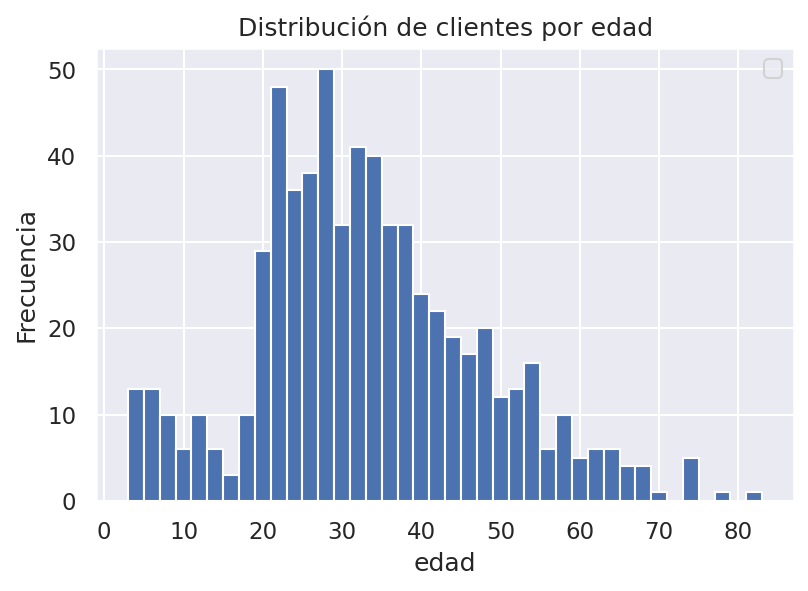

In [ ]:
plt.figure(dpi=150)

plt.hist(df['edad'], bins=40)

plt.title("Distribución de clientes por edad")
plt.ylabel("Frecuencia")
plt.xlabel("edad")
plt.legend()
plt.show()

In [ ]:

df2 = df.groupby(['nombre', 'edad'])['nombre'].count().unstack('edad')
df2[['volvera']].plot(kind='bar', stacked=True)

KeyError: "None of [Index(['volvera'], dtype='object', name='edad')] are in the [columns]"

In [ ]:
plt.figure(dpi=150)

plt.hist(df_volveria['edad'], bins=40)

plt.title("Distribución de clientes que volverian por edad")
plt.ylabel("Frecuencia")
plt.xlabel("edad")
plt.legend()
plt.show()

In [ ]:
plt.figure(dpi=150)

plt.hist(df_no_volveria['edad'], bins=40)

plt.title("Distribución de clientes que no volverian por edad")
plt.ylabel("Frecuencia")
plt.xlabel("edad")
plt.legend()
plt.show()

In [ ]:
over15 = df.edad.value_counts() > 15
edades_over15 = df.edad.value_counts()[over15]
edades_over15

27.0    28
25.0    25
22.0    25
21.0    23
31.0    23
33.0    22
28.0    22
24.0    21
39.0    20
32.0    18
38.0    18
34.0    18
36.0    17
19.0    17
29.0    16
30.0    16
Name: edad, dtype: int64

In [ ]:
df_grueso_clientes = df[df.edad.isin(edades_over15.index)]
df_grueso_clientes.head()

tipo_de_sala                     nombre  id_usuario  genero  edad  amigos  \
7            4d      Señor Carlos Gregorio          91  hombre  32.0       0   
11           4d    Señor Ernesto Reginaldo          90  hombre  27.0       0   
12           4d     Señor Paulino Virgilio         815  hombre  34.0       0   
14           4d  Señor Rubens Carlos Randy         510  hombre  29.0       0   
17           4d    Señorita Alicia Augusta         107   mujer  24.0       0   

    parientes id_ticket  precio_ticket fila      nombre_sede volveria  
7           0    565498              1  NaN  fiumark_palermo       No  
11          0    565497              1  NaN  fiumark_palermo       No  
12          0    5866;;              1  NaN  fiumark_palermo       No  
14          0      3823              6  NaN  fiumark_palermo       Si  
17          0    565342              1  NaN  fiumark_palermo       Si

In [ ]:
df_grueso_clientes['cont_edad_genero'] = 1
df_grueso_clientes['cont_edad_sede'] = 1
df_grueso_clientes['cont_edad_sala'] = 1
df_grueso_clientes['cont_volvera'] = 1
df_grueso_clientes['cant_acompañado'] = df_grueso_clientes['parientes'] + df_grueso_clientes['amigos']
df_grueso_clientes.head()

<ipython-input-19-43151484733a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grueso_clientes['cont_edad_genero'] = 1
<ipython-input-19-43151484733a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grueso_clientes['cont_edad_sede'] = 1
<ipython-input-19-43151484733a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

tipo_de_sala                     nombre  id_usuario  genero  edad  amigos  \
7            4d      Señor Carlos Gregorio          91  hombre  32.0       0   
11           4d    Señor Ernesto Reginaldo          90  hombre  27.0       0   
12           4d     Señor Paulino Virgilio         815  hombre  34.0       0   
14           4d  Señor Rubens Carlos Randy         510  hombre  29.0       0   
17           4d    Señorita Alicia Augusta         107   mujer  24.0       0   

    parientes id_ticket  precio_ticket fila      nombre_sede volveria  \
7           0    565498              1  NaN  fiumark_palermo       No   
11          0    565497              1  NaN  fiumark_palermo       No   
12          0    5866;;              1  NaN  fiumark_palermo       No   
14          0      3823              6  NaN  fiumark_palermo       Si   
17          0    565342              1  NaN  fiumark_palermo       Si   

    cont_edad_genero  cont_edad_sede  cont_edad_sala  cont_volvera  \
7                  1               1               1             1   
11                 1               1               1             1   
12                 1               1               1             1   
14                 1               1               1             1   
17                 1               1               1             1   

    cant_acompañado  
7                 0  
11                0  
12                0  
14                0  
17                0

In [ ]:
df_grueso_clientes['cant_acompañado'].value_counts()

0    214
1     59
2     34
3     12
4      5
5      4
7      1
Name: cant_acompañado, dtype: int64

In [ ]:
df_edad_genero = df_grueso_clientes.loc[:, ['edad', 'genero', 'cont_edad_genero']].groupby(by=["edad", "genero"]).sum()
df_edad_genero.columns = ['cont_edad_genero']

In [ ]:
df_edad_genero = df_edad_genero.unstack()

In [ ]:
df_edad_genero

cont_edad_genero      
genero           hombre mujer
edad                         
19.0                 11     6
21.0                 11    12
22.0                 18     7
24.0                 14     7
25.0                 13    12
27.0                 13    15
28.0                 17     5
29.0                 11     5
30.0                 11     5
31.0                 16     7
32.0                 12     6
33.0                 13     9
34.0                 10     8
36.0                 10     7
38.0                 10     8
39.0                 13     7

Text(0.5, 0, 'Edad')

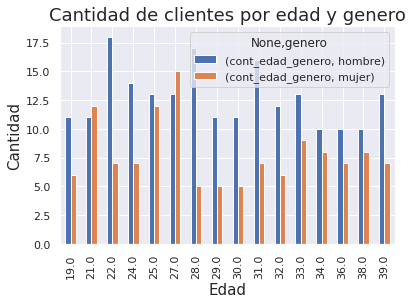

In [ ]:
'''
Grafico de barras de clientes por edad y genero.
'''
g = df_edad_genero.plot.bar()
g.set_title("Cantidad de clientes por edad y genero", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Edad", fontsize=15)

In [ ]:
df_edad_sede = df_grueso_clientes.loc[:, ['edad', 'nombre_sede', 'cont_edad_sede']].groupby(by=["edad", "nombre_sede"]).sum()
df_edad_sede.columns = ['cont_edad_sede']
df_edad_sede = df_edad_sede.unstack()
df_edad_sede

cont_edad_sede                                
nombre_sede fiumark_chacarita fiumark_palermo fiumark_quilmes
edad                                                         
19.0                      1.0            14.0             2.0
21.0                      4.0            18.0             1.0
22.0                      1.0            22.0             2.0
24.0                      1.0            18.0             2.0
25.0                      4.0            20.0             1.0
27.0                      7.0            21.0             NaN
28.0                      3.0            18.0             1.0
29.0                      2.0            14.0             NaN
30.0                      4.0            12.0             NaN
31.0                      2.0            21.0             NaN
32.0                      3.0            14.0             1.0
33.0                      7.0            14.0             1.0
34.0                      2.0            14.0             2.0
36.0                      3.0            13.0             1.0
38.0                      4.0            14.0             NaN
39.0                      3.0            17.0             NaN

Text(0.5, 0, 'Edad')

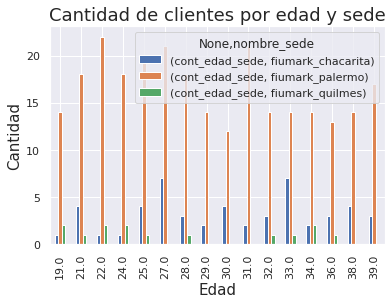

In [ ]:
'''
Grafico de barras de clientes por edad y sede.
'''
g = df_edad_sede.plot.bar()
g.set_title("Cantidad de clientes por edad y sede", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Edad", fontsize=15)

In [ ]:
df_edad_sala = df_grueso_clientes.loc[:, ['edad', 'tipo_de_sala', 'cont_edad_sala']].groupby(by=["edad", "tipo_de_sala"]).sum()
df_edad_sala.columns = ['cont_edad_sala']
df_edad_sala = df_edad_sala.unstack()
df_edad_sala

cont_edad_sala           
tipo_de_sala             3d  4d normal
edad                                  
19.0                      2  12      3
21.0                      5  14      4
22.0                      6  14      5
24.0                      3  15      3
25.0                      2  18      5
27.0                     10  11      7
28.0                      7  13      2
29.0                      2  12      2
30.0                      4   8      4
31.0                      8  11      4
32.0                      5  11      2
33.0                      6  10      6
34.0                      5   9      4
36.0                      5   8      4
38.0                      3   7      8
39.0                      7   5      8

Text(0.5, 0, 'Edad')

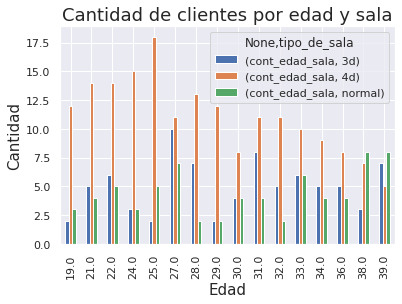

In [ ]:
'''
Grafico de barras de clientes por edad y sala.
'''
g = df_edad_sala.plot.bar()
g.set_title("Cantidad de clientes por edad y sala", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Edad", fontsize=15)

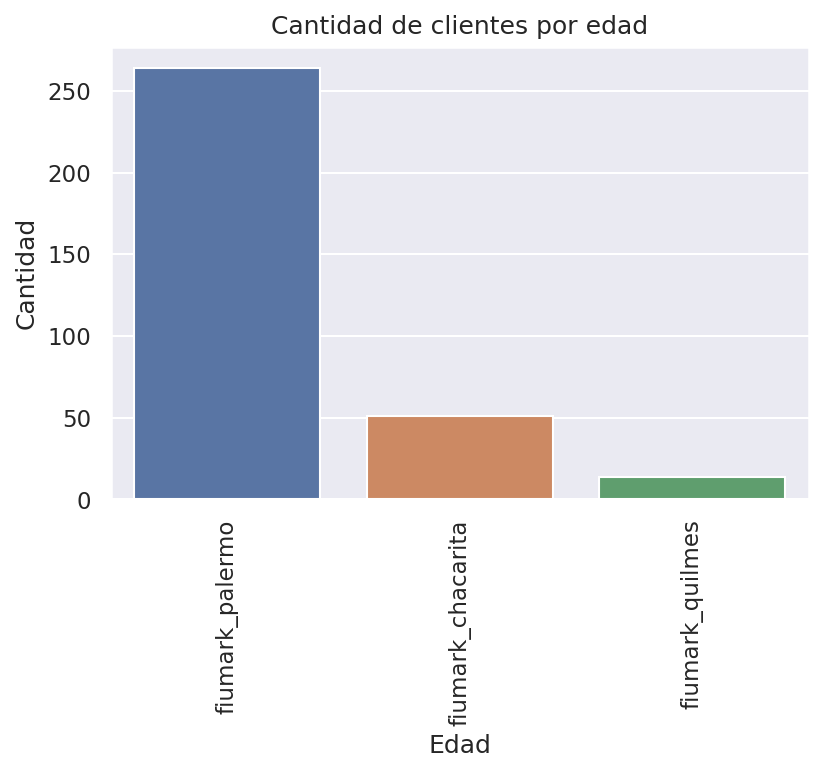

In [ ]:
plt.figure(dpi=150)
sns.countplot(
    x="nombre_sede", data=df_grueso_clientes, order=df_grueso_clientes["nombre_sede"].value_counts().iloc[:20].index
)
plt.ylabel("Cantidad")
plt.xlabel("Edad")
plt.title("Cantidad de clientes por edad")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df["amigos"].value_counts(sort=True, ascending=True)

5      5
8      6
3     14
4     15
2     25
1    179
0    557
Name: amigos, dtype: int64

In [ ]:
df["parientes"].value_counts(sort=True, ascending=True)

6      1
4      4
5      4
3      5
2     70
1    110
0    607
Name: parientes, dtype: int64

# Veo la distribucion de la gente de con quien va al cine

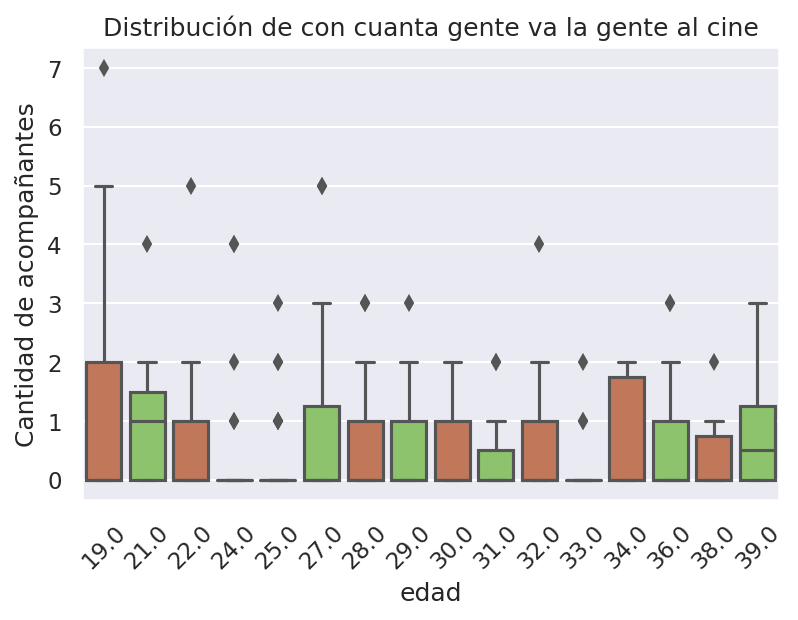

In [ ]:
plt.figure(dpi=150)
plt.title("Distribución de con cuanta gente va la gente al cine")
sns.boxplot(
    data=df_grueso_clientes,
    y='cant_acompañado',
    x='edad',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Cantidad de acompañantes")
#plt.xticks([False, True], ["No", "Sí"])
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_edad_volvera = df_grueso_clientes.loc[:, ['edad', 'volveria', 'cont_volvera']].groupby(by=["edad", 'volveria']).sum()
df_edad_volvera.columns = ['cont_volvera']

#df_edad_genero = df_grueso_clientes.loc[:, ['edad', 'genero', 'cont_edad_genero']].groupby(by=["edad", "genero"]).sum()
#df_edad_genero.columns = ['cont_edad_genero']

In [ ]:
df_edad_volvera.head(6)

cont_volvera
edad volveria              
19.0 No                  11
     Si                   6
21.0 No                  15
     Si                   8
22.0 No                  16
     Si                   9

In [ ]:
df_edad_volvera = df_edad_volvera.unstack()

In [ ]:
#df_edad_volvera.volveria

In [ ]:
df_edad_volvera.head(6)

cont_volvera    
volveria           No  Si
edad                     
19.0               11   6
21.0               15   8
22.0               16   9
24.0               16   5
25.0               15  10
27.0               14  14

Text(0.5, 0, 'Edad')

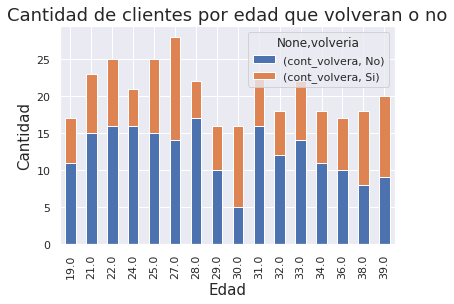

In [ ]:
'''
Grafico de barras de clientes por edad y sala.
'''
g = df_edad_volvera.plot.bar(stacked = True)
g.set_title("Cantidad de clientes por edad que volveran o no", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Edad", fontsize=15)

# Veamos cuantos clientes vuelven por sede

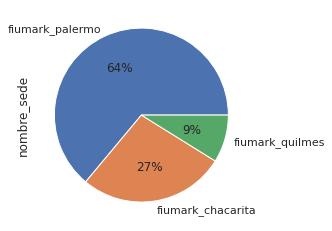

In [ ]:
df_volveria['nombre_sede'].value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)

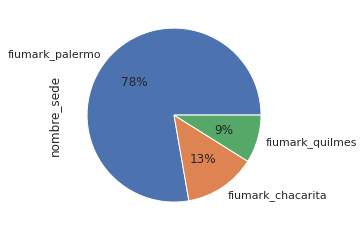

In [ ]:
df_no_volveria['nombre_sede'].value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)

# Heatmap de clientes por sede y tipo de sala

Ahora vamos a proceder a ver si la gente de alguna sede tiende mas a volver o no, por supuesto vamos a hacer esto tambien por tipo de sala

In [ ]:
df_volveria['aparicion'] = 1
for_heatmap = df_volveria.pivot_table(index='nombre_sede', columns='tipo_de_sala', values='aparicion', aggfunc='sum')

<ipython-input-41-02862def0eab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volveria['aparicion'] = 1


Text(29.593749999999993, 0.5, 'Nombre sede')

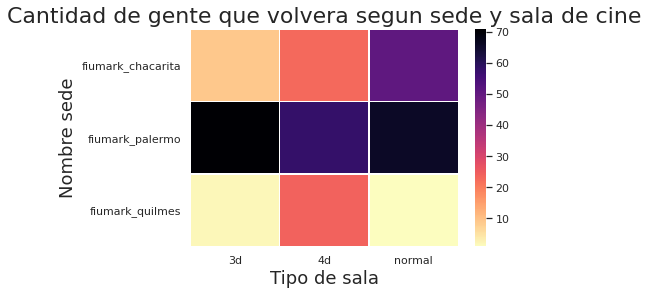

In [ ]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="magma_r") # annot=True
g.set_title("Cantidad de gente que volvera segun sede y sala de cine", fontsize=22)
g.set_xlabel("Tipo de sala",fontsize=18)
g.set_ylabel("Nombre sede", fontsize=18)

In [ ]:
df_no_volveria['aparicion'] = 1
for_heatmap_no = df_no_volveria.pivot_table(index='nombre_sede', columns='tipo_de_sala', values='aparicion', aggfunc='sum')

<ipython-input-43-23c1a524d20a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_volveria['aparicion'] = 1


Text(29.593749999999993, 0.5, 'Nombre sede')

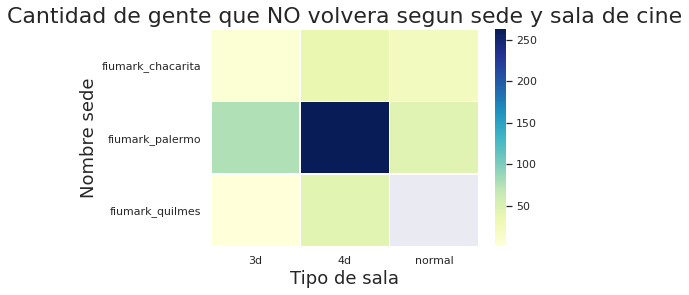

In [ ]:
g = sns.heatmap(for_heatmap_no, linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de gente que NO volvera segun sede y sala de cine", fontsize=22)
g.set_xlabel("Tipo de sala",fontsize=18)
g.set_ylabel("Nombre sede", fontsize=18)

Ok, de esto podemos sacar las siguientes conclusiones:

    1. de Fiubamark Quilmes:
    
        a. De la sala normal parece que todos volverian
    
    2. de Fiubamark Palermo:
    
        a. De la sala 4D hay una GRAN cantidad de gente que no volveria a ver Frozen 4
        
    3. de Fiubamark Chacarita:
    
    

# VER

las demas casillas no quedan muy claras, convendria usar un grafico extra para estos valores tan confusos?

# Heatmap de mayoria de clientes por edad y tipo de sala

In [ ]:
g = sns.heatmap(df_grueso_clientes, linewidths=.5, cmap="magma_r") # annot=True
g.set_title("Cantidad de instalaciones segun hora y dia", fontsize=22)
g.set_xlabel("Edad",fontsize=18)
g.set_ylabel("tipo_de_sala", fontsize=18)
